# Observações das manchas solares



---
O **objetivo** dessa análise é mostrar um pouco mais sobre a atividade do Sol com ênfase no tópico das manchas solares. Com uma **linguegem acessível**, será feita uma visão dos momentos que mais ocorreram as manchas e quais serão as espectativas para os ciclos daqui para frente.

---
## O que são manchas solares?                                                 
As manchas são **efeitos temporários** na superfície do Sol, a origem desses efeitos ainda é um tanto desconhecida, mas sabe-se que existe uma relação com o campo magnético e com o ciclo de atividade solar. A temperatura das manchas podem variar entre 2000k-4000k e o **tempo que elas ficam visíveis pode ser de dias ou de meses**.

[Vídeo da NASA que mostra as manchas solares em ação](https://www.youtube.com/watch?v=6tmbeLTHC_0&feature=emb_logo).


***

#### Importando bibliotecas e criando um DataFrame

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [22]:
manchas_solares = pd.read_csv('sunspot_data.csv')
manchas_solares

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...,...
73713,73713,2019,10,27,2019.821,0,0.0,34,0
73714,73714,2019,10,28,2019.823,0,0.0,34,0
73715,73715,2019,10,29,2019.826,0,0.0,30,0
73716,73716,2019,10,30,2019.829,0,0.0,24,0


#### Mudando nome das colunas

In [23]:
manchas_solares.rename(columns={'Year': 'ano', 'Observations': 'observacoes', 'Number of Sunspots': 'numero_de_manchas',
                           'Month': 'mes', 'Day': 'dia', 'Standard Deviation':'desvio_padrao'}, inplace=True)

In [24]:
manchas_solares = manchas_solares[['ano', 'mes', 'dia', 'numero_de_manchas', 'observacoes']]
manchas_solares

,ano,mes,dia,numero_de_manchas,observacoes
0,1818,1,1,-1,0
1,1818,1,2,-1,0
2,1818,1,3,-1,0
3,1818,1,4,-1,0
4,1818,1,5,-1,0
...,...,...,...,...,...
73713,2019,10,27,0,34
73714,2019,10,28,0,34
73715,2019,10,29,0,30
73716,2019,10,30,0,24


### Análise de manchas por ano

Agora vamos analisar em quais períodos as manchas solares foram mais evidentes e mais observadas. (Como os dados que foram perdidos são equivalentes a -1, podemos eliminar eles.)

In [25]:
selecao = manchas_solares.numero_de_manchas == -1
manchas_solares = manchas_solares[~selecao]
manchas_solares.reset_index(inplace = True, drop = True)
manchas_solares

,ano,mes,dia,numero_de_manchas,observacoes
0,1818,1,8,65,1
1,1818,1,13,37,1
2,1818,1,17,77,1
3,1818,1,18,98,1
4,1818,1,19,105,1
...,...,...,...,...,...
70466,2019,10,27,0,34
70467,2019,10,28,0,34
70468,2019,10,29,0,30
70469,2019,10,30,0,24


#### Agrupando valores por ano

In [26]:
manchas_vistas = manchas_solares.groupby('ano').sum()
manchas_vistas = manchas_vistas[['numero_de_manchas', 'observacoes']]
manchas_vistas.reset_index(inplace = True)
manchas_vistas.head(10)

,ano,numero_de_manchas,observacoes
0,1818,11276,213
1,1819,9595,249
2,1820,5428,224
3,1821,2791,304
4,1822,2208,353
5,1823,658,302
6,1824,2218,194
7,1825,8748,310
8,1826,19165,320
9,1827,26642,321


In [27]:
def cria_grafico(titulo, x, y, nome_labelx, nome_labely, data):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    grafico = sns.lineplot(x = x, y = y, data = data)
    grafico.figure.set_size_inches(12, 6)
    grafico.set_title(titulo, loc = 'left', fontsize = 18)
    grafico.set_xlabel(nome_labelx, fontsize = 14)
    grafico.set_ylabel(nome_labely, fontsize = 14)
    grafico = grafico

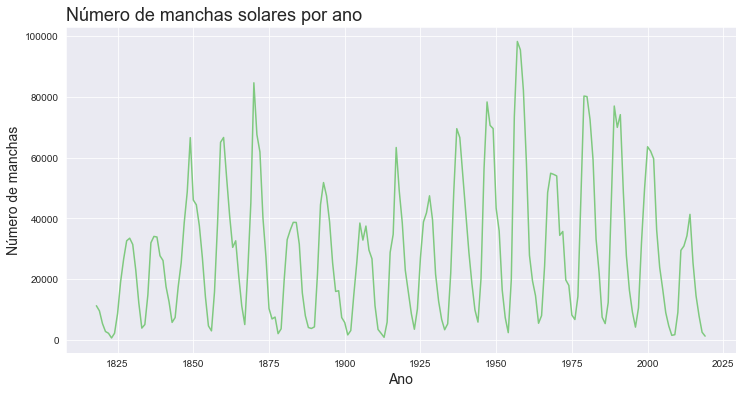

In [28]:
cria_grafico('Número de manchas solares por ano', 'ano', 'numero_de_manchas', 'Ano', 'Número de manchas', manchas_vistas)

Para ver melhor o que está acontecendo, vamos selecionar um período do gráfico.

#### Selecionando o período de 1900-1936

In [29]:
selecao_periodo = manchas_vistas.query('1900 <= ano <= 1936')
selecao_periodo.head(10)

,ano,numero_de_manchas,observacoes
82,1900,5742,365
83,1901,1674,365
84,1902,3103,365
85,1903,14875,365
86,1904,25668,366
87,1905,38504,365
88,1906,32887,365
89,1907,37511,365
90,1908,29606,366
91,1909,26724,365


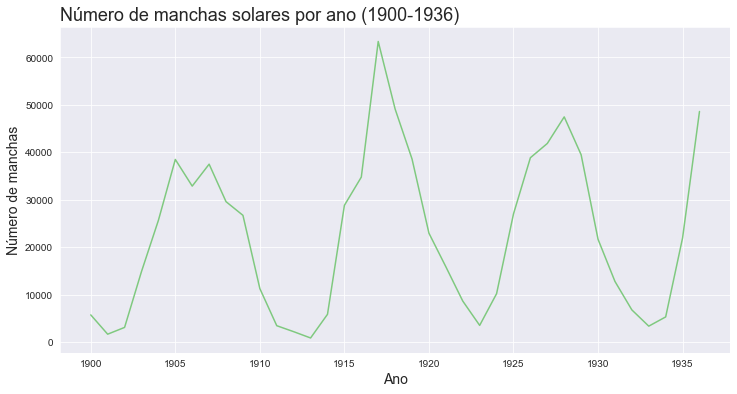

In [30]:
cria_grafico('Número de manchas solares por ano (1900-1936)',
             'ano', 'numero_de_manchas', 'Ano', 'Número de manchas', selecao_periodo)

A partir de uma leitura rápido do gráfico acima, é possível notar que existem oscilações e intervalos quase definidos, isso acontece devido ao **ciclo de atividade solar** que é de, em média, 11 anos e nesse intervalo a temperatura da coroa do Sol (veja na figura abaixo) aumenta, deixando a situação mais favorável para as manchas acontecerem. Vamos visualizar cada período de 11 anos em gráficos separados.

Camadas do Sol:

In [31]:
url = "https://i0.wp.com/socientifica.com.br/wp-content/uploads/2020/04/camadas_do_sol-1.jpg?ssl=1"
Image(url = url, width = 400, height = 400)

fonte: https://socientifica.com.br/qual-a-temperatura-do-sol/

Para ver melhor os ciclos, vou separar o período de 1900 - 1936 em períodos menores de 11 anos cada.

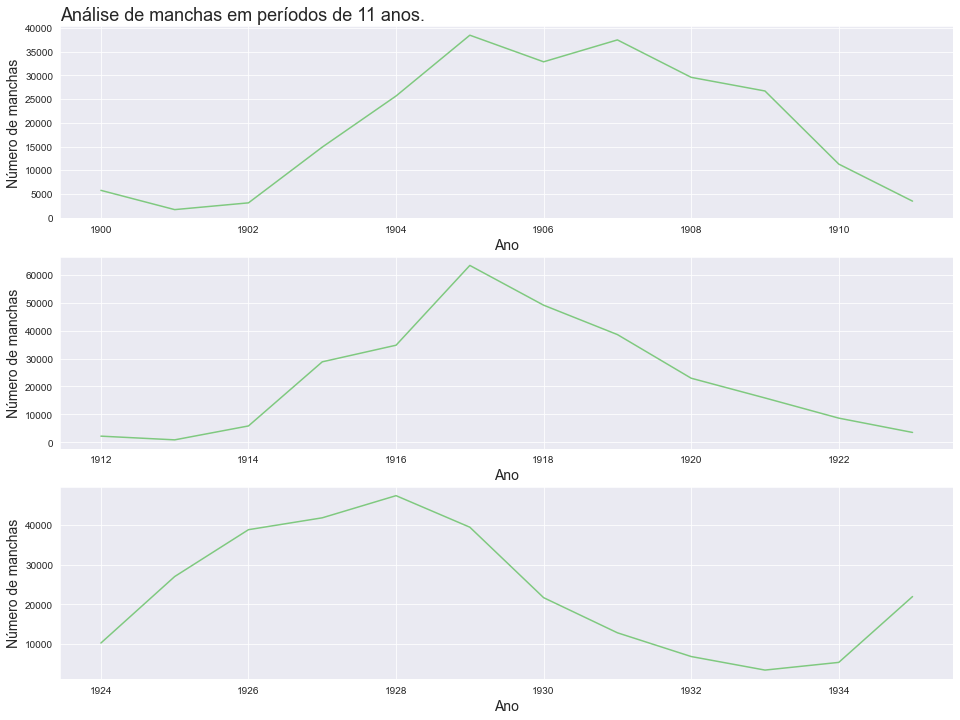

In [32]:
# customização
sns.set_palette('Accent')
sns.set_style('darkgrid')

plt.figure(figsize = (16, 12))

# gráfico 1
grafico = plt.subplot(3, 1, 1)
grafico.set_title('Análise de manchas em períodos de 11 anos.', fontsize = 18, loc = 'left')
grafico = sns.lineplot(x = 'ano', y = 'numero_de_manchas', data = selecao_periodo.query('ano < 1912'))
grafico.set_xlabel('Ano', fontsize = 14)
grafico.set_ylabel('Número de manchas', fontsize = 14)

# gráfico 2
plt.subplot(3, 1, 2)
grafico = sns.lineplot(x = 'ano', y = 'numero_de_manchas', data = selecao_periodo.query('1912 <= ano < 1924'))
grafico.set_xlabel('Ano', fontsize = 14)
grafico.set_ylabel('Número de manchas', fontsize = 14)

# gráfico 3
plt.subplot(3, 1, 3)
grafico = sns.lineplot(x = 'ano', y = 'numero_de_manchas', data = selecao_periodo.query('1924 <= ano < 1936'))
grafico.set_xlabel('Ano', fontsize = 14)
grafico.set_ylabel('Número de manchas', fontsize = 14)
grafico = grafico

Em cada gráfico é possível ver os picos dos intervalos de 11 anos.

#### Pensando um pouco mais nos gráficos
Olhando os gráficos nota-se uma possível simetria em cada um deles, mas podemos afirmar isso?
Para avaliar essa questão, vamos plotar o mesmo conjunto, mas usando o .distplot() e utilizando o kde.

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

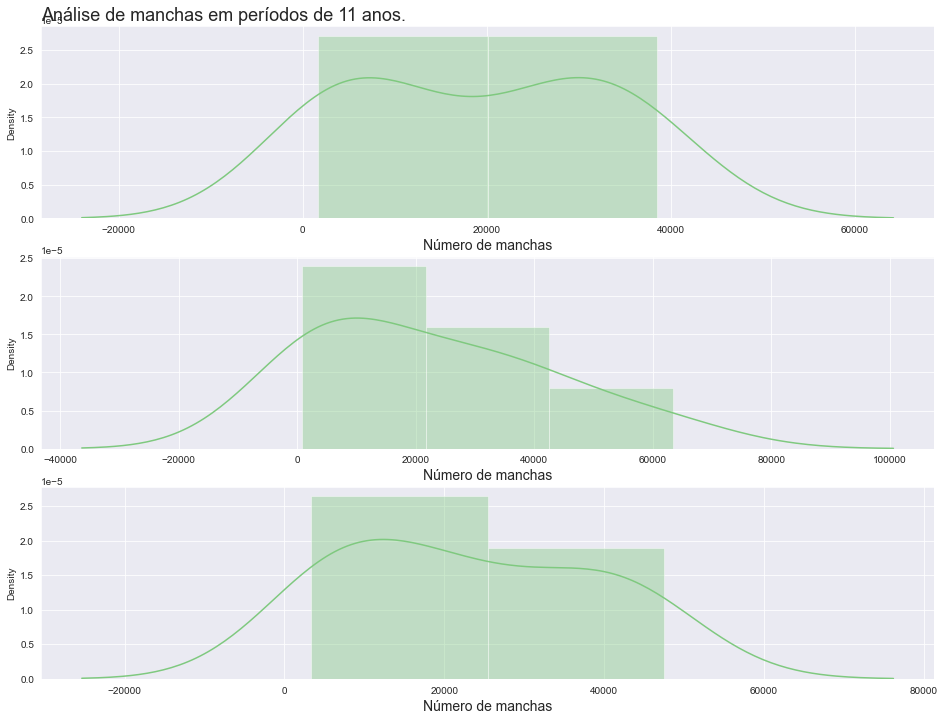

In [33]:
# customização
sns.set_palette('Accent')
sns.set_style('darkgrid')

plt.figure(figsize = (16, 12))

# gráfico 1
grafico = plt.subplot(3, 1, 1)
grafico.set_title('Análise de manchas em períodos de 11 anos.', fontsize = 18, loc = 'left')
grafico = sns.distplot(selecao_periodo.query('ano < 1912').numero_de_manchas, kde=True)
grafico.set_xlabel('Número de manchas', fontsize = 14)

# gráfico 2
plt.subplot(3, 1, 2)
grafico = sns.distplot(selecao_periodo.query('1912 <= ano < 1924').numero_de_manchas, kde=True)
grafico.set_xlabel('Número de manchas', fontsize = 14)

# gráfico 3
plt.subplot(3, 1, 3)
grafico = sns.distplot(selecao_periodo.query('1924 <= ano < 1936').numero_de_manchas, kde=True)
grafico.set_xlabel('Número de manchas', fontsize = 14)
grafico = grafico

Agora está bem mais fácil de enxergar se o gráfico é assimétrico ou não.

- No primeiro gráfico podemos notar que ele possui uma distribuição bimodal simétrica.
- No segundo gráfico vemos que possui uma distribuição assimétrica à direita.
- No terceiro gráfico podemos notar que ele possui uma distribuição bimodal assimétrica à direita.

E qual o motivo dessa análise dos gráficos? Podemos tirar algumas conclusões entre a relação das medidas de tendência central (média, moda e mediana). Claro, em outros períodos (de 11 anos) podem haver situações em que os gráficos tenham um comportamento diferente dos 3 apresentados acima.

---
### O mínimo solar

O mínimo solar, diferente do máximo solar que ocorre um aumento na atividade do Sol, é marcado pela transição entre os ciclos solares e pela baixa atividade, no caso essa passagem ocorreu entre o final de 2019 até o outubro de 2020.

In [34]:
# Selecionando o ano de 2019 do primeiro DataFrame criado
manchas_2019 = manchas_solares.query('ano == 2019')[['numero_de_manchas', 'mes']]
manchas_2019.reset_index(drop = True, inplace = True)

# Agrupando por mês
manchas_2019 = manchas_2019.groupby('mes').sum()
manchas_2019.reset_index(inplace = True)
manchas_2019

,mes,numero_de_manchas
0,1,239
1,2,23
2,3,292
3,4,272
4,5,307
5,6,35
6,7,27
7,8,23
8,9,33
9,10,13


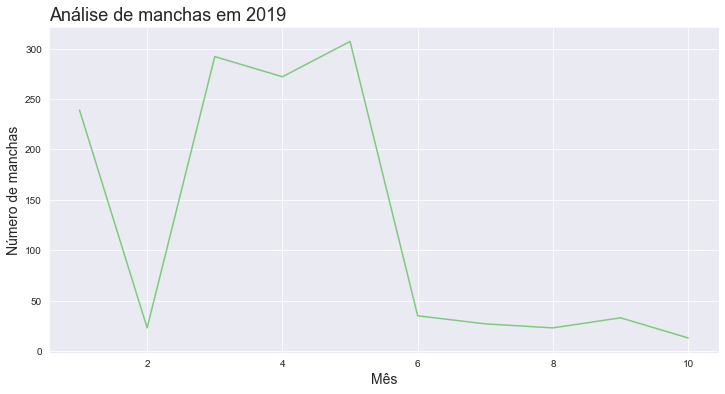

In [35]:
cria_grafico('Análise de manchas em 2019', 'mes', 'numero_de_manchas', 'Mês', 'Número de manchas', manchas_2019)

No caso do ano de 2019, é possível notar que, embora houve aumentos de manchas em certos meses, ocrreu uma diminuição. Essa queda pode ter ocorrido devido à transição do ciclo 24 para o 25.

---
### O ciclo 25

Os pesquisadores estimam que o clico 25 seja um pouco mais fraco do que seus antecessores, já que está havendo uma queda de força dos ciclos desde 1980. Vamos observar essa queda.

In [36]:
manchas_vistas

,ano,numero_de_manchas,observacoes
0,1818,11276,213
1,1819,9595,249
2,1820,5428,224
3,1821,2791,304
4,1822,2208,353
...,...,...,...
197,2015,25483,8903
198,2016,14575,9940
199,2017,7935,11444
200,2018,2545,12611


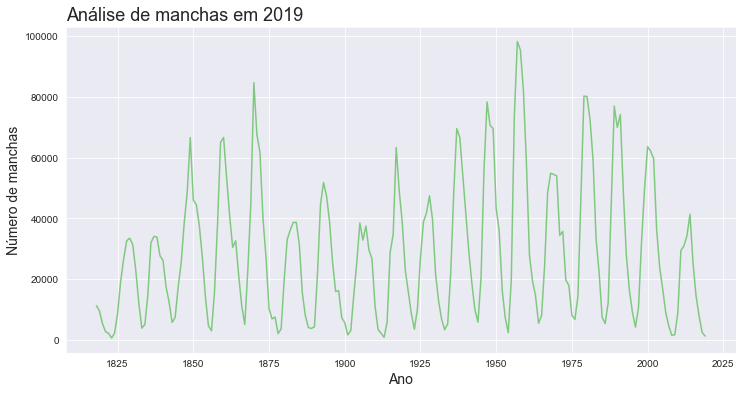

In [37]:
cria_grafico('Análise de manchas em 2019', 'ano', 'numero_de_manchas', 'Ano', 'Número de manchas', manchas_vistas)

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


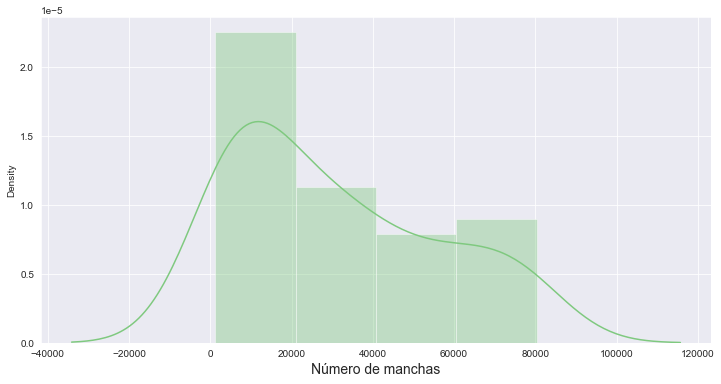

In [38]:
#gráfico do período de 1975 - 2019
sns.set_palette('Accent')
sns.set_style('darkgrid')
grafico.set_title('Análise de manchas em períodos de 11 anos.', fontsize = 18, loc = 'left')
grafico = sns.distplot(manchas_vistas.query('ano >= 1975').numero_de_manchas, kde=True)
grafico.figure.set_size_inches(12, 6)
grafico.set_xlabel('Número de manchas', fontsize = 14)
grafico = grafico

---
## Conclusão

  O estudo das manchas solares, assim como o estudo do Sol de uma forma completa, é muito importante para que possamos entender os efeitos causados na Terra devido as altas atividades do Sol, prever o que pode acontecer nos próximos ciclos do Sol é fundamental para evitar futuros danos a vários objetos que estão na atmosfera terrestre, algumas atividades solares são tão fortes que podem afetar desde os sistemas de comunicação até os astronautas que estão na Estação Espacial Internacional.                                                 
  No tópico "Ciclo 25" é falado que os pesquisadores estimam que o ciclo 25 seja fraco, mas, como algumas previsões anteriores já estiveram erradas, essa pode estar também e o ciclo 25 ser um início de uma crescente na atividade dos ciclos, apesar dessa hipótese, os pesquisadores estão confiantes nos resultados, já que a tecnologia avançou com o tempo.                            
                                                                                
Observações: passe filtro solar e não olhe diretamente para o Sol sem proteção!

---
Referências

Dataset: https://www.kaggle.com/abhinand05/daily-sun-spot-data-1818-to-2019

SITE INFOESCOLA. Mancha Solar. Disponível em www.infoescola.com/astronomia/mancha-solar/. Capturado em 27/10/2020

SITE INOVAÇÃO TECNOLÓGICA. Começou o Ciclo Solar 25. 16/09/2020. Online. Disponível em www.inovacaotecnologica.com.br/noticias/noticia.php?artigo=ciclo-solar-25-comecou. Capturado em 09/11/2020.

SITE MARINHA DO BRASIL. Impactos dos fenômenos solares na atmosfera terrestre. Online. Disponível em www.marinha.mil.br/secirm/proantar/noticias/impactos. Capturado em 09/11/2020


---